In [1]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics, StatsPlots
pdb = "egfr"
casa = string("/home/pbarletta/labo/20/bisana/run/mas_egfr")
casa_10 = string("/home/pbarletta/labo/20/bisana/run/egfr_10")
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

### Volúmenes de cavidades egfr

In [2]:
im_lista = convert(Array{String, 1}, readdlm(joinpath(casa, "im.list"))[:, 1])
am_lista = convert(Array{String, 1}, readdlm(joinpath(casa, "am.list"))[:, 1])
mm_lista = convert(Array{String, 1}, readdlm(joinpath(casa, "mm.list"))[:, 1])

n_im = length(im_lista)
n_am = length(am_lista)
n_mm = length(mm_lista)

vol_im = Array{Float64, 1}(undef, n_im)
vol_am = Array{Float64, 1}(undef, n_am)
vol_mm = Array{Float64, 1}(undef, n_mm)

for i in 1:n_im
    vol_im[i] = convert(Float64, readdlm(joinpath(
        casa, "cavidad", string("vol_", im_lista[i])))[1, 2])
end

for i in 1:n_am
    vol_am[i] = convert(Float64, readdlm(joinpath(
        casa, "cavidad", string("vol_", am_lista[i])))[1, 2])
end

for i in 1:n_mm
    vol_mm[i] = convert(Float64, readdlm(joinpath(
        casa, "cavidad", string("vol_", mm_lista[i])))[1, 2])
end

### Flexibilidad de cavidades egfr

In [3]:
flx_im = Array{Float64, 1}(undef, n_im)
flx_am = Array{Float64, 1}(undef, n_am)
flx_mm = Array{Float64, 1}(undef, n_mm)

for i in 1:n_im
    flx_im[i] = convert(Float64, readdlm(joinpath(
        casa_10, "cavidad", string("flx_", im_lista[i])))[1, 2])
end

for i in 1:n_am
    flx_am[i] = convert(Float64, readdlm(joinpath(
        casa_10, "cavidad", string("flx_", am_lista[i])))[1, 2])
end

for i in 1:n_mm
    flx_mm[i] = convert(Float64, readdlm(joinpath(
        casa_10, "cavidad", string("flx_", mm_lista[i])))[1, 2])
end

## Resultados

In [4]:
NamedArray([mean(vol_im) std(vol_im) std(vol_im) / mean(vol_im) ;
        mean(vol_am) std(vol_am) std(vol_am) / mean(vol_am) ;
        mean(vol_mm) std(vol_mm) std(vol_mm) / mean(vol_mm)],
    ([ "Inactive" ; "Active" ; "Mixed"], ["μ" ; "std" ; "std / μ"]))

3×3 Named Array{Float64,2}
   A ╲ B │         μ        std    std / μ
─────────┼────────────────────────────────
Inactive │    1226.3    211.824   0.172734
Active   │    1641.3    337.845    0.20584
Mixed    │   1708.76    83.8876  0.0490926

In [5]:
NamedArray([mean(flx_im) std(flx_im) std(flx_im) / mean(flx_im) ;
        mean(flx_am) std(flx_am) std(flx_am) / mean(flx_am) ;
        mean(flx_mm) std(flx_mm) std(flx_mm) / mean(flx_mm)],
    ([ "Inactive" ; "Active" ; "Mixed"], ["μ" ; "std" ; "std / μ"]))

3×3 Named Array{Float64,2}
   A ╲ B │           μ          std      std / μ
─────────┼──────────────────────────────────────
Inactive │ 0.000493358  0.000232001     0.470249
Active   │ 0.000252341   7.96272e-5     0.315553
Mixed    │  0.00024937   3.73182e-5      0.14965

In [6]:
st = 200
min_vol = 700
max_vol = 2500
bin_vol = collect(min_vol:st:max_vol)

wgh_vol = fill(1.0, length(vol_im))
Wbins_vol_im, Whis_vol_im = JUMD.weightedHist(vol_im, bin_vol, wgh_vol, true, false);

wgh_vol = fill(1.0, length(vol_am))
Wbins_vol_am, Whis_vol_am = JUMD.weightedHist(vol_am, bin_vol, wgh_vol, true, false);

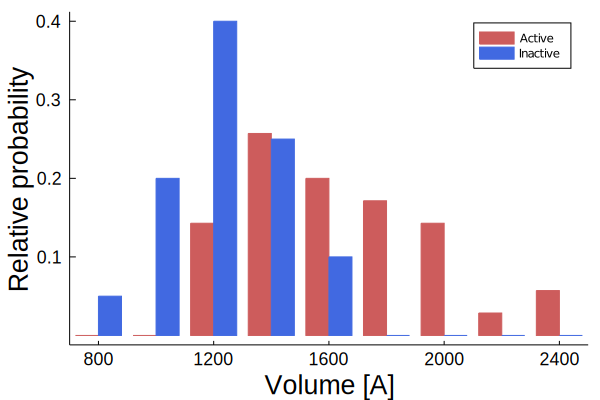

In [7]:
plt_his_vol = groupedbar([Wbins_vol_im; Wbins_vol_am], [ Whis_vol_im Whis_vol_am ],
    group = repeat(["Inactive", "Active"], inner = length(Wbins_vol_im)),
    fillcolor = [ Colors.colorant"IndianRed" Colors.colorant"RoyalBlue" ],
    linecolor = [ Colors.colorant"IndianRed" Colors.colorant"RoyalBlue" ],
    
    xlims = (min_vol, max_vol),
    xticks = min_vol+st/2:st*2:max_vol-st/2, yticks = .1:.1:.4,
    grid = false, 
    
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Volume [A]")

In [8]:
savefig(plt_his_vol, joinpath(rtdos, string("vol_egfr", ".svg")))

## Rigidez de EGFR

In [16]:
st = 0.0001
min_rig = round(minimum(flx_am), digits = 4)
max_rig = round(maximum(flx_im), digits = 3)
bin_rig = collect(min_rig:st:max_rig)

wgh_rig = fill(1.0, length(flx_im))
Wbins_rig_im, Whis_rig_im = JUMD.weightedHist(flx_im, bin_rig, wgh_rig, true, true);

wgh_rig = fill(1.0, length(flx_am))
Wbins_rig_am, Whis_rig_am = JUMD.weightedHist(flx_am, bin_rig, wgh_rig, true, true);

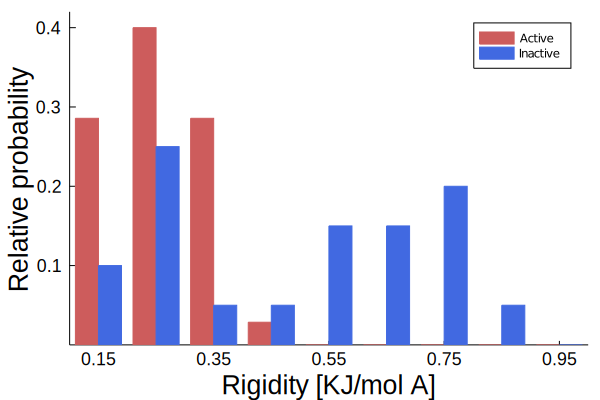

In [17]:
k = 1E3
plt_his_rig = groupedbar([Wbins_rig_im*k; Wbins_rig_am*k], [ Whis_rig_im Whis_rig_am ],
    group = repeat(["Inactive", "Active"], inner = length(Wbins_rig_im)),
    fillcolor = [ Colors.colorant"IndianRed" Colors.colorant"RoyalBlue" ],
    linecolor = [ Colors.colorant"IndianRed" Colors.colorant"RoyalBlue" ],
    
    xlims = (min_rig*k, max_rig*k), ylims = (0, .42),
    xticks = [ Wbins_rig_im[i]*k for i in 1:2:length(Wbins_rig_im)], yticks = .1:.1:.4,
    grid = false, 
    
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Rigidity [KJ/mol A]")

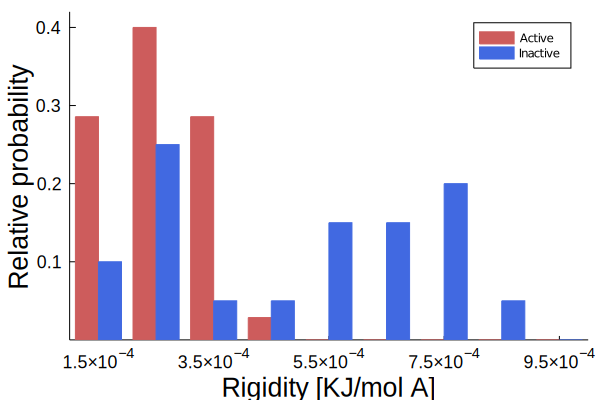

In [18]:
plt_his_rig = groupedbar([Wbins_rig_im; Wbins_rig_am], [ Whis_rig_im Whis_rig_am ],
    group = repeat(["Inactive", "Active"], inner = length(Wbins_rig_im)),
    fillcolor = [ Colors.colorant"IndianRed" Colors.colorant"RoyalBlue" ],
    linecolor = [ Colors.colorant"IndianRed" Colors.colorant"RoyalBlue" ],
    
    xlims = (min_rig, max_rig), ylims = (0, .42),
    xticks = [ Wbins_rig_im[i] for i in 1:2:length(Wbins_rig_im)], yticks = .1:.1:.4,
    grid = false, xformatter = :scientific,
    
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Rigidity [KJ/mol A]")

In [19]:
savefig(plt_his_rig, joinpath(rtdos, string("rig_egfr", ".svg")))